In [1464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score,roc_auc_score,cohen_kappa_score

In [1465]:
filename = 'data.dat'
indata1 = np.loadtxt(filename, usecols =(0,1,2,3,4,5,6,7,8,9,10,11,12,13))
dataset = pd.DataFrame({'yas':indata1[:,0], 'cinsiyet':indata1[:,1], 'gogusagri':indata1[:,2], 'istirahatkan':indata1[:,3],
                        'serumkolesterol':indata1[:,4], 'kansekeri':indata1[:,5], 'elektrokardiyografik':indata1[:,6],
                        'kalpatis':indata1[:,7], 'anjina':indata1[:,8], 'STdepresyon':indata1[:,9], 'STegim':indata1[:,10],
                       'anadamarsayisi':indata1[:,11], 'tersinikusur':indata1[:,12], 'hastalikdurumu':indata1[:,13]})
print(dataset)

      yas  cinsiyet  gogusagri  istirahatkan  serumkolesterol  kansekeri  elektrokardiyografik  \
0    70.0       1.0        4.0         130.0            322.0        0.0                   2.0   
1    67.0       0.0        3.0         115.0            564.0        0.0                   2.0   
2    57.0       1.0        2.0         124.0            261.0        0.0                   0.0   
3    64.0       1.0        4.0         128.0            263.0        0.0                   0.0   
4    74.0       0.0        2.0         120.0            269.0        0.0                   2.0   
..    ...       ...        ...           ...              ...        ...                   ...   
265  52.0       1.0        3.0         172.0            199.0        1.0                   0.0   
266  44.0       1.0        2.0         120.0            263.0        0.0                   0.0   
267  56.0       0.0        2.0         140.0            294.0        0.0                   2.0   
268  57.0       1.0 

In [1466]:
types=dataset.dtypes
print(types)

yas                     float64
cinsiyet                float64
gogusagri               float64
istirahatkan            float64
serumkolesterol         float64
kansekeri               float64
elektrokardiyografik    float64
kalpatis                float64
anjina                  float64
STdepresyon             float64
STegim                  float64
anadamarsayisi          float64
tersinikusur            float64
hastalikdurumu          float64
dtype: object


In [1467]:

set_option ('display.width',100)
set_option ('precision',3)
description = dataset.describe()
print(description)

           yas  cinsiyet  gogusagri  istirahatkan  serumkolesterol  kansekeri  \
count  270.000   270.000    270.000       270.000          270.000    270.000   
mean    54.433     0.678      3.174       131.344          249.659      0.148   
std      9.109     0.468      0.950        17.862           51.686      0.356   
min     29.000     0.000      1.000        94.000          126.000      0.000   
25%     48.000     0.000      3.000       120.000          213.000      0.000   
50%     55.000     1.000      3.000       130.000          245.000      0.000   
75%     61.000     1.000      4.000       140.000          280.000      0.000   
max     77.000     1.000      4.000       200.000          564.000      1.000   

       elektrokardiyografik  kalpatis   anjina  STdepresyon   STegim  anadamarsayisi  \
count               270.000   270.000  270.000      270.000  270.000         270.000   
mean                  1.022   149.678    0.330        1.050    1.585           0.670   
std   

In [1468]:
dataset.isnull().sum()

yas                     0
cinsiyet                0
gogusagri               0
istirahatkan            0
serumkolesterol         0
kansekeri               0
elektrokardiyografik    0
kalpatis                0
anjina                  0
STdepresyon             0
STegim                  0
anadamarsayisi          0
tersinikusur            0
hastalikdurumu          0
dtype: int64

In [1469]:
hastalikdurumu_counts = dataset.groupby('hastalikdurumu').size()
print(hastalikdurumu_counts)

hastalikdurumu
1.0    150
2.0    120
dtype: int64


In [1470]:
set_option('display.width',100)
set_option('precision',3)
correlations = dataset.corr(method='pearson')
print(correlations)

                        yas  cinsiyet  gogusagri  istirahatkan  serumkolesterol  kansekeri  \
yas                   1.000    -0.094      0.097         0.273            0.220      0.123   
cinsiyet             -0.094     1.000      0.035        -0.063           -0.202      0.042   
gogusagri             0.097     0.035      1.000        -0.043            0.090     -0.099   
istirahatkan          0.273    -0.063     -0.043         1.000            0.173      0.156   
serumkolesterol       0.220    -0.202      0.090         0.173            1.000      0.025   
kansekeri             0.123     0.042     -0.099         0.156            0.025      1.000   
elektrokardiyografik  0.128     0.039      0.074         0.116            0.168      0.053   
kalpatis             -0.402    -0.076     -0.318        -0.039           -0.019      0.022   
anjina                0.098     0.180      0.353         0.083            0.078     -0.004   
STdepresyon           0.194     0.097      0.167         0.2

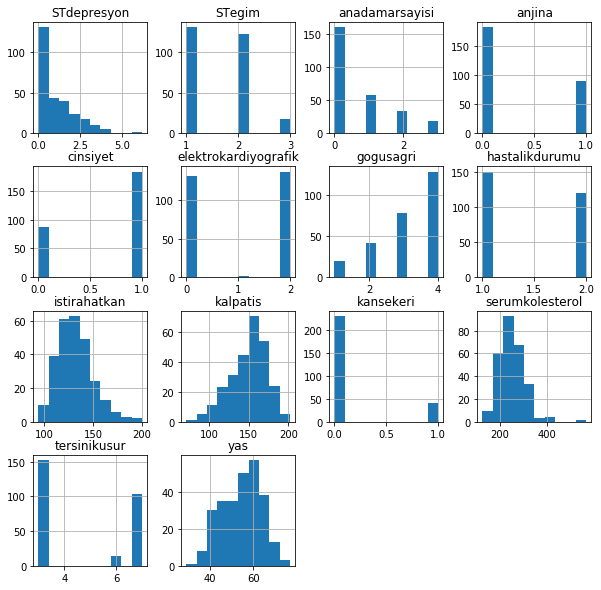

In [1471]:

dataset.hist(figsize=(10,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260068DF1C8>]],
      dtype=object)

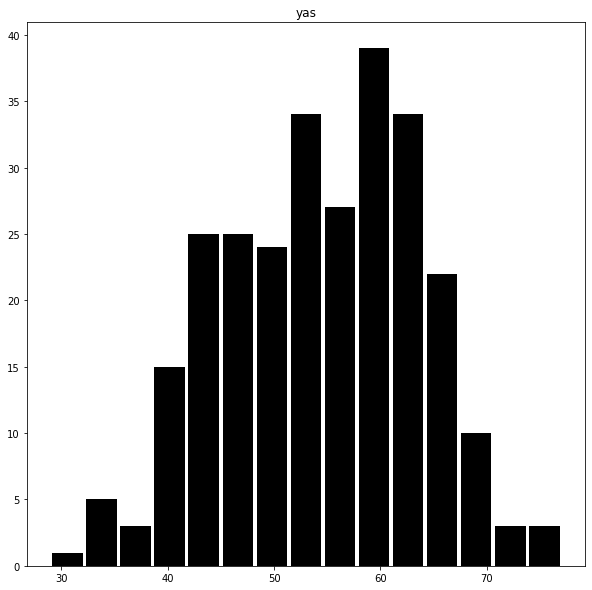

In [1472]:
dataset.hist(column='yas', bins=15, grid=False, figsize=(10,10), color='#000000', zorder=2, rwidth=0.9)

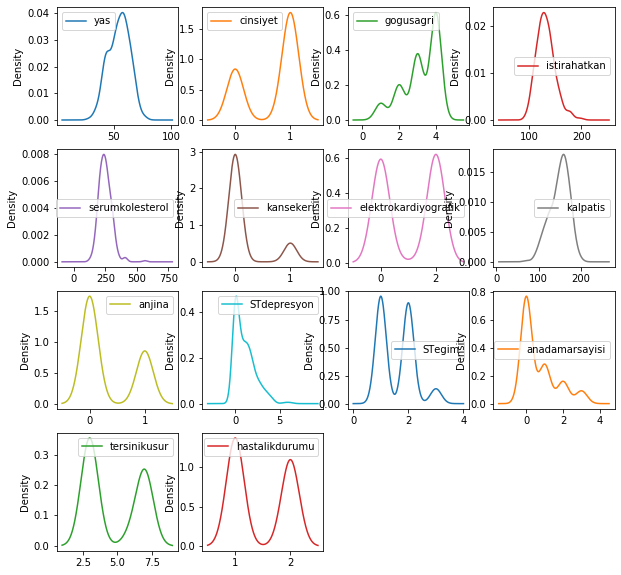

In [1473]:
dataset.plot(kind='density', subplots=True, figsize=(10,10), layout=(4,4), sharex=False)
plt.show()

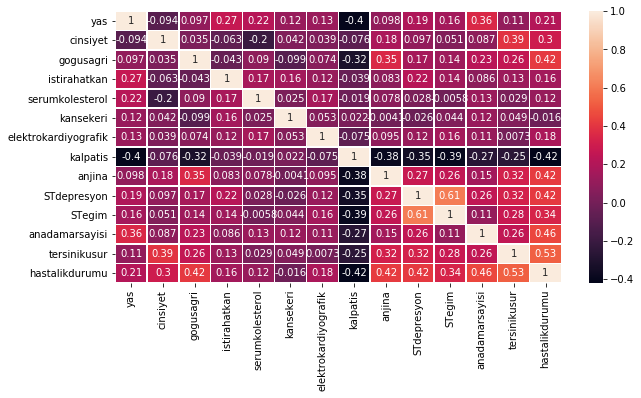

In [1474]:
j=dataset.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(j, annot=True, linewidths=.5, ax=ax)

# K-Neighbors

In [1475]:
dataset.head()

,yas,cinsiyet,gogusagri,istirahatkan,serumkolesterol,kansekeri,elektrokardiyografik,kalpatis,anjina,STdepresyon,STegim,anadamarsayisi,tersinikusur,hastalikdurumu
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1.0


In [1476]:
cat_col =["cinsiyet","gogusagri","kansekeri","elektrokardiyografik","STegim","anadamarsayisi","tersinikusur"]
dataset = pd.get_dummies(dataset, columns = cat_col)

In [1477]:
dataset = dataset.drop(["cinsiyet_0.0","gogusagri_1.0","kansekeri_0.0","elektrokardiyografik_0.0",
            "STegim_1.0","anadamarsayisi_0.0","tersinikusur_3.0"],axis = 1)

In [1478]:
dataset.head()

,yas,istirahatkan,serumkolesterol,kalpatis,anjina,STdepresyon,hastalikdurumu,cinsiyet_1.0,gogusagri_2.0,gogusagri_3.0,...,kansekeri_1.0,elektrokardiyografik_1.0,elektrokardiyografik_2.0,STegim_2.0,STegim_3.0,anadamarsayisi_1.0,anadamarsayisi_2.0,anadamarsayisi_3.0,tersinikusur_6.0,tersinikusur_7.0
0,70.0,130.0,322.0,109.0,0.0,2.4,2.0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,67.0,115.0,564.0,160.0,0.0,1.6,1.0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,57.0,124.0,261.0,141.0,0.0,0.3,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,64.0,128.0,263.0,105.0,1.0,0.2,1.0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,1.0,0.2,1.0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [1479]:
dataset.columns

Index(['yas', 'istirahatkan', 'serumkolesterol', 'kalpatis', 'anjina', 'STdepresyon',
       'hastalikdurumu', 'cinsiyet_1.0', 'gogusagri_2.0', 'gogusagri_3.0', 'gogusagri_4.0',
       'kansekeri_1.0', 'elektrokardiyografik_1.0', 'elektrokardiyografik_2.0', 'STegim_2.0',
       'STegim_3.0', 'anadamarsayisi_1.0', 'anadamarsayisi_2.0', 'anadamarsayisi_3.0',
       'tersinikusur_6.0', 'tersinikusur_7.0'],
      dtype='object')

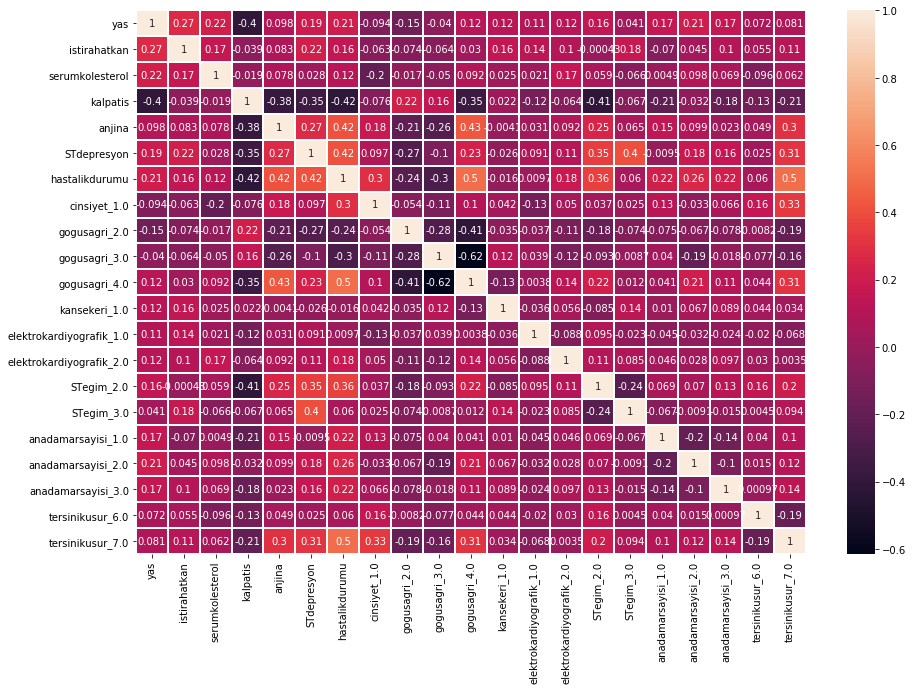

In [1480]:
j=dataset.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(j, annot=True, linewidths=1, ax=ax)

In [1481]:
dataset.head()

,yas,istirahatkan,serumkolesterol,kalpatis,anjina,STdepresyon,hastalikdurumu,cinsiyet_1.0,gogusagri_2.0,gogusagri_3.0,...,kansekeri_1.0,elektrokardiyografik_1.0,elektrokardiyografik_2.0,STegim_2.0,STegim_3.0,anadamarsayisi_1.0,anadamarsayisi_2.0,anadamarsayisi_3.0,tersinikusur_6.0,tersinikusur_7.0
0,70.0,130.0,322.0,109.0,0.0,2.4,2.0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,67.0,115.0,564.0,160.0,0.0,1.6,1.0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,57.0,124.0,261.0,141.0,0.0,0.3,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,64.0,128.0,263.0,105.0,1.0,0.2,1.0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,1.0,0.2,1.0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [1482]:
X = dataset.drop(["hastalikdurumu"], axis=1)
Y = dataset["hastalikdurumu"]

In [1483]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,
                                                test_size=0.2,
                                                random_state=42)

In [1484]:
print(x_train)

      yas  istirahatkan  serumkolesterol  kalpatis  anjina  STdepresyon  cinsiyet_1.0  \
115  49.0         134.0            271.0     162.0     0.0          0.0             0   
33   59.0         170.0            326.0     140.0     1.0          3.4             1   
184  53.0         130.0            246.0     173.0     0.0          0.0             1   
142  50.0         140.0            233.0     163.0     0.0          0.6             1   
197  54.0         110.0            214.0     158.0     0.0          1.6             0   
..    ...           ...              ...       ...     ...          ...           ...   
20   67.0         120.0            229.0     129.0     1.0          2.6             1   
188  62.0         140.0            394.0     157.0     0.0          1.2             0   
71   57.0         120.0            354.0     163.0     1.0          0.6             0   
106  51.0         100.0            222.0     143.0     1.0          1.2             1   
102  49.0         130

In [1485]:
model = KNeighborsClassifier()
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [1486]:
print('eğitim verisi için doğruluk oranı: ',accuracy_score(y_pred1,y_train))
print('test verisi için doğruluk: ',accuracy_score(y_pred, y_test))

eğitim verisi için doğruluk oranı:  0.5416666666666666
test verisi için doğruluk:  0.6111111111111112


# Standartlaştırma

In [1487]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform (x_test)


In [1488]:

model = KNeighborsClassifier()
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std)
y_pred1 = model.predict(x_train_std)


In [1489]:

print('standartlandirilmis eğitim verisi için doğruluk oranı: ',accuracy_score(y_pred1,y_train))
print('standartlasmis test verisi için doğruluk: ',accuracy_score(y_pred, y_test))

standartlandirilmis eğitim verisi için doğruluk oranı:  0.8611111111111112
standartlasmis test verisi için doğruluk:  0.7592592592592593


# pca

In [1490]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None, random_state=42)
pca.fit_transform(x_train_std)
pca.fit_transform(x_test_std)
exp_var = pca.explained_variance_ratio_
np.set_printoptions(suppress=True)
print(exp_var)

[0.15486911 0.10430945 0.09211688 0.08086034 0.07795512 0.0710905
 0.06061709 0.06039164 0.0548974  0.04695333 0.04125566 0.03629845
 0.03038269 0.02536163 0.02143471 0.01871674 0.01139827 0.00812066
 0.00297032 0.        ]


In [1491]:
exp_var = np.round(pca.explained_variance_ratio_*100, decimals=1 )
labels = ['PC'+ str(x) for x in range(1, len(exp_var)+1)]

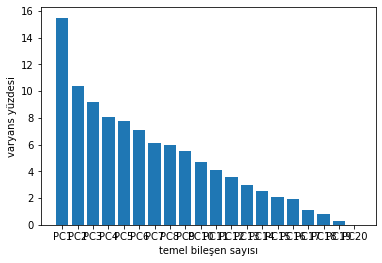

In [1492]:
plt.bar(x=range(1,len(var_yuzdesi)+1),height = exp_var, tick_label=labels)
plt.ylabel("varyans yüzdesi")
plt.xlabel("temel bileşen sayısı")
plt.show()

In [1493]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9, random_state=42)

x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.fit_transform(x_test_std)
exp_var = pca.explained_variance_ratio_

np.set_printoptions(suppress=True)
print(exp_var)

[0.15486911 0.10430945 0.09211688 0.08086034 0.07795512 0.0710905
 0.06061709 0.06039164 0.0548974 ]


In [1494]:
print(x_train_pca)

[[-2.23808161  0.03044027 -1.60222786 ... -0.426621    1.18298326
  -0.04723883]
 [ 3.04247376  1.47986574  0.20558463 ...  1.45411171  1.27130775
  -1.42738915]
 [-1.53661653  2.17465108  1.86383096 ... -1.64919593 -0.17826752
  -0.25512878]
 ...
 [-0.17788814 -0.11318848 -2.02663559 ...  0.86088385  0.53925395
  -0.20733536]
 [-0.60396466 -0.90714309  1.44519111 ... -1.10485606 -0.95224054
  -0.0874238 ]
 [-1.3617107  -0.24107355 -1.56241327 ...  0.10442435  0.35632008
  -0.08251798]]


# Parametre Optimizasyonu

In [1495]:
#?KNeighborsClassifier

In [1496]:
knc = KNeighborsClassifier()

In [1497]:
knc_params = {"n_neighbors":np.arange(1,50),
             "leaf_size":[2,3,5,10,20,30,50]}

In [1498]:

knc_tuned = GridSearchCV(knc,knc_params, cv=10, n_jobs=-1, verbose =2,scoring="accuracy")
knc_tuned = knc_tuned.fit(x_train_pca, y_train)

Fitting 10 folds for each of 343 candidates, totalling 3430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3326 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 3430 out of 3430 | elapsed:    5.8s finished


In [1499]:
knc_tuned.best_score_

0.8385281385281385

In [1500]:
knc_tuned.best_params_

{'leaf_size': 2, 'n_neighbors': 36}

In [1501]:
knc_final = KNeighborsClassifier(n_neighbors = 36, leaf_size = 2).fit(x_train_pca, y_train)
y_pred = knc_final.predict(x_test_pca)
accuracy_score(y_test, y_pred)

0.8148148148148148

# Precision and Recall 

In [1502]:
print("Hassaslık-kesinlik (Precision):", precision_score(y_test,y_pred))
print("duyarlılık (Recall):",recall_score(y_test, y_pred))


Hassaslık-kesinlik (Precision): 0.8484848484848485
duyarlılık (Recall): 0.8484848484848485


In [1503]:
print(confusion_matrix(y_test, y_pred))

[[28  5]
 [ 5 16]]


test


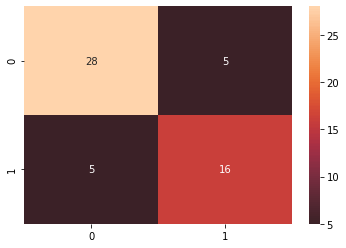

In [1504]:
print('test')
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,center=True,annot=True,fmt='d')

In [1505]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.85      0.85      0.85        33
         2.0       0.76      0.76      0.76        21

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



In [1506]:
f1_skoru = f1_score(y_test, y_pred)
print("f1 skorumuz:",f1_skoru)
alan = roc_auc_score(y_test, y_pred)
print('ROC eğrisindeki alanı:',alan)
print('cohen kappa test',cohen_kappa_score(y_test, y_pred))

f1 skorumuz: 0.8484848484848486
ROC eğrisindeki alanı: 0.8051948051948052
cohen kappa test 0.6103896103896105


In [1439]:
dataset.head()

,yas,istirahatkan,serumkolesterol,kalpatis,anjina,STdepresyon,hastalikdurumu,cinsiyet_1.0,gogusagri_2.0,gogusagri_3.0,...,kansekeri_1.0,elektrokardiyografik_1.0,elektrokardiyografik_2.0,STegim_2.0,STegim_3.0,anadamarsayisi_1.0,anadamarsayisi_2.0,anadamarsayisi_3.0,tersinikusur_6.0,tersinikusur_7.0
0,70.0,130.0,322.0,109.0,0.0,2.4,2.0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,67.0,115.0,564.0,160.0,0.0,1.6,1.0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,57.0,124.0,261.0,141.0,0.0,0.3,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,64.0,128.0,263.0,105.0,1.0,0.2,1.0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,1.0,0.2,1.0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
